In [ ]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [ ]:
#mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read file form GoogleDrive
df = pd.read_csv('/content/drive/MyDrive/Text Mining SI 20C/new_clean_file_after_text_preprocessing(1).csv')

#df = pd.read_csv('new_clean_file_after_text_preprocessing.csv')
#df['processed'].head() #first 5 rows in column 'title'
#df #all rows

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#print existing column on file
print(list(df))

['article', 'token', 'token_no_stopwords', 'stemmed_words', 'processed', 'article_clean']


In [ ]:
#split text
text = df['article_clean']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

99
[['asosiasi', 'fintech', 'dana', 'sama', 'indonesia', 'afpi', 'catat', 'laku', 'usaha', 'kecil', 'mikro', 'kecil', 'tengah', 'umkm', 'dominasi', 'jadi', 'pinjam', 'borrower', 'fintech', 'peer', 'to', 'peer', 'lending', 'fintech', 'dana', 'beri', 'gambar', 'industri', 'fintech', 'dana', 'peran', 'penting', 'ekonomi', 'nasional', 'jadi', 'jawab', 'biaya', 'digital', 'saat', 'pandemi', 'teliti', 'dailysocial', 'research', 'tajuk', 'evolving', 'landscape', 'of', 'fintech', 'lending', 'in', 'indonesia', 'sebut', 'pinjam', 'fintech', 'dana', 'dominasi', 'laku', 'umkm', 'online', 'offline', 'fintech', 'dana', 'klaster', 'syariah', 'besar', 'persen', 'umkm', 'online', 'klaster', 'produktif', 'besar', 'persen', 'umkm', 'offline', 'klaster', 'konsumtif', 'besar', 'persen', 'umkm', 'offline', 'ketua', 'umum', 'afpi', 'sekaligus', 'founder', 'ceo', 'investree', 'adrian', 'gunadi', 'kata', 'riset', 'laku', 'lalu', 'survey', 'anggota', 'afpi', 'total', 'anggota', 'hasil', 'kerjasama', 'afpi', 'me

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<852 unique tokens: ['adrian', 'adrian_gunadi', 'alternatif', 'amir', 'amir_karimuddin']...>


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[98])

#build TF-IDF model
tfidf = models.TfidfModel(doc_term_matrix) 
corpus_tfidf = tfidf[doc_term_matrix]

99
[(727, 1), (728, 1), (729, 1), (730, 1), (731, 1), (732, 1), (733, 1), (734, 1), (735, 1), (736, 1), (737, 1), (738, 1), (739, 1), (740, 1), (741, 1), (742, 1), (743, 1), (744, 1), (745, 1), (746, 1), (747, 1), (748, 1), (749, 1), (750, 1), (751, 1), (752, 1), (753, 1), (754, 1), (755, 3), (756, 1), (757, 2), (758, 1), (759, 1), (760, 1), (761, 1), (762, 1), (763, 1), (764, 1), (765, 1), (766, 1), (767, 1), (768, 1), (769, 1), (770, 1), (771, 1), (772, 5), (773, 1), (774, 1), (775, 1), (776, 1), (777, 1), (778, 1), (779, 1), (780, 1), (781, 1), (782, 1), (783, 1), (784, 1), (785, 1), (786, 1), (787, 1), (788, 2), (789, 1), (790, 1), (791, 1), (792, 1), (793, 3), (794, 6), (795, 1), (796, 2), (797, 1), (798, 5), (799, 12), (800, 1), (801, 1), (802, 2), (803, 1), (804, 1), (805, 1), (806, 1), (807, 11), (808, 1), (809, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

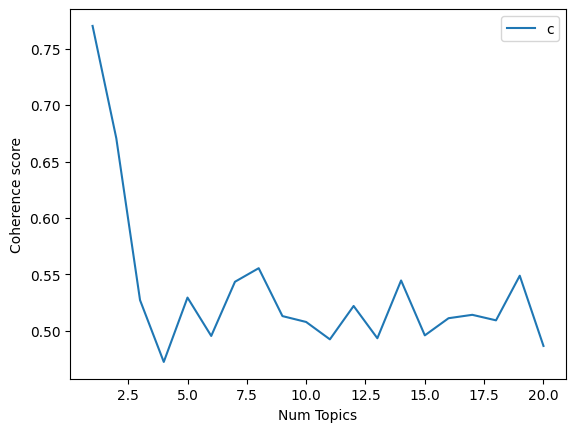

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.77
Num Topics = 2  has Coherence Value of 0.6705
Num Topics = 3  has Coherence Value of 0.5273
Num Topics = 4  has Coherence Value of 0.4726
Num Topics = 5  has Coherence Value of 0.5296
Num Topics = 6  has Coherence Value of 0.4956
Num Topics = 7  has Coherence Value of 0.5436
Num Topics = 8  has Coherence Value of 0.5556
Num Topics = 9  has Coherence Value of 0.5132
Num Topics = 10  has Coherence Value of 0.508
Num Topics = 11  has Coherence Value of 0.4926
Num Topics = 12  has Coherence Value of 0.5221
Num Topics = 13  has Coherence Value of 0.4936
Num Topics = 14  has Coherence Value of 0.5447
Num Topics = 15  has Coherence Value of 0.4961
Num Topics = 16  has Coherence Value of 0.5113
Num Topics = 17  has Coherence Value of 0.5143
Num Topics = 18  has Coherence Value of 0.5094
Num Topics = 19  has Coherence Value of 0.5489
Num Topics = 20  has Coherence Value of 0.4868


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=2) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.008*"alami" + 0.007*"akseleran" + 0.006*"danain" + 0.005*"bank_dunia" + 0.004*"data_pribadi" + 0.003*"offline" + 0.003*"mas_agung" + 0.003*"klaster" + 0.003*"tabung_deposito" + 0.003*"in"
Topic: 1 Word: 0.007*"sistem_manajemen" + 0.007*"uangteman" + 0.006*"easycash" + 0.006*"fintopia" + 0.005*"pertama_kali" + 0.005*"temu" + 0.005*"penuh_lima" + 0.004*"sertifikasi_iso" + 0.004*"akseleran" + 0.004*"satgas_waspada"


In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 50)])
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2_50_clean.csv")
print(df)


None


In [ ]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [ ]:
#import gensim
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim_clean.html')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:concurrent.futures:exception calling callback for <Future at 0x7ff719e30820 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following except

BrokenProcessPool: ignored